### **Concessão de Credito**

Este notebook se trata de uma análise exploratória para identificar o perfil de clientes inadimplentes de uma instituição financeira fictícia.

### **Bibliotecas**

In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

<frozen importlib._bootstrap>:241: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


### **Dados**

In [5]:
df = pd.read_csv('https://raw.githubusercontent.com/andre-marcos-perez/ebac-course-utils/develop/dataset/credito.csv')

In [6]:
df.head(10)

,id,default,idade,sexo,dependentes,escolaridade,estado_civil,salario_anual,tipo_cartao,meses_de_relacionamento,qtd_produtos,iteracoes_12m,meses_inativo_12m,limite_credito,valor_transacoes_12m,qtd_transacoes_12m
0,768805383,0,45,M,3,ensino medio,casado,$60K - $80K,blue,39,5,3,1,"12.691,51","1.144,90",42
1,818770008,0,49,F,5,mestrado,solteiro,menos que $40K,blue,44,6,2,1,"8.256,96","1.291,45",33
2,713982108,0,51,M,3,mestrado,casado,$80K - $120K,blue,36,4,0,1,"3.418,56","1.887,72",20
3,769911858,0,40,F,4,ensino medio,na,menos que $40K,blue,34,3,1,4,"3.313,03","1.171,56",20
4,709106358,0,40,M,3,sem educacao formal,casado,$60K - $80K,blue,21,5,0,1,"4.716,22","816,08",28
5,713061558,0,44,M,2,mestrado,casado,$40K - $60K,blue,36,3,2,1,"4.010,69","1.088,07",24
6,810347208,0,51,M,4,na,casado,$120K +,gold,46,6,3,1,"34.516,72","1.330,87",31
7,818906208,0,32,M,0,ensino medio,na,$60K - $80K,silver,27,2,2,2,"29.081,49","1.538,32",36
8,710930508,0,37,M,3,sem educacao formal,solteiro,$60K - $80K,blue,36,5,0,2,"22.352,50","1.350,14",24
9,719661558,0,48,M,2,mestrado,solteiro,$80K - $120K,blue,36,6,3,3,"11.656,41","1.441,73",32


### **Exploração**

In [7]:
df.shape

(10127, 16)

In [8]:
total_de_clientes, _ = df.shape
clientes_adimplentes, _ = df[df['default'] == 0].shape
clientes_inadimplentes, _ = df[df['default'] == 1].shape

In [9]:
print(f"A proporcão clientes adimplentes é de {round(100 * clientes_adimplentes / total_de_clientes, 2)}%")
print(f"A proporcão clientes inadimplentes é de {round(100 * clientes_inadimplentes / total_de_clientes, 2)}%")

A proporcão clientes adimplentes é de 83.93%
A proporcão clientes inadimplentes é de 16.07%


In [10]:
df.dtypes

id                          int64
default                     int64
idade                       int64
sexo                       object
dependentes                 int64
escolaridade               object
estado_civil               object
salario_anual              object
tipo_cartao                object
meses_de_relacionamento     int64
qtd_produtos                int64
iteracoes_12m               int64
meses_inativo_12m           int64
limite_credito             object
valor_transacoes_12m       object
qtd_transacoes_12m          int64
dtype: object

In [11]:
df.select_dtypes('object').describe().transpose() # Para a exibição dos atributos categóricos

,count,unique,top,freq
sexo,10127,2,F,5358
escolaridade,10127,6,mestrado,3128
estado_civil,10127,4,casado,4687
salario_anual,10127,6,menos que $40K,3561
tipo_cartao,10127,4,blue,9436
limite_credito,10127,9272,"1.438,21",11
valor_transacoes_12m,10127,10035,"3.851,51",3


In [12]:
df.drop('id', axis=1).select_dtypes('number').describe().transpose() # Para a exibição de atributos numéricos

,count,mean,std,min,25%,50%,75%,max
default,10127.0,0.160660,0.367235,0.0,0.0,0.0,0.0,1.0
idade,10127.0,46.325960,8.016814,26.0,41.0,46.0,52.0,73.0
dependentes,10127.0,2.346203,1.298908,0.0,1.0,2.0,3.0,5.0
meses_de_relacionamento,10127.0,35.928409,7.986416,13.0,31.0,36.0,40.0,56.0
qtd_produtos,10127.0,3.812580,1.554408,1.0,3.0,4.0,5.0,6.0
iteracoes_12m,10127.0,2.455317,1.106225,0.0,2.0,2.0,3.0,6.0
meses_inativo_12m,10127.0,2.341167,1.010622,0.0,2.0,2.0,3.0,6.0
qtd_transacoes_12m,10127.0,64.858695,23.472570,10.0,45.0,67.0,81.0,139.0


### **Dados Faltantes**

In [13]:
df.isna().any()

id                         False
default                    False
idade                      False
sexo                       False
dependentes                False
escolaridade               False
estado_civil               False
salario_anual              False
tipo_cartao                False
meses_de_relacionamento    False
qtd_produtos               False
iteracoes_12m              False
meses_inativo_12m          False
limite_credito             False
valor_transacoes_12m       False
qtd_transacoes_12m         False
dtype: bool

In [14]:
df.isnull().any()

id                         False
default                    False
idade                      False
sexo                       False
dependentes                False
escolaridade               False
estado_civil               False
salario_anual              False
tipo_cartao                False
meses_de_relacionamento    False
qtd_produtos               False
iteracoes_12m              False
meses_inativo_12m          False
limite_credito             False
valor_transacoes_12m       False
qtd_transacoes_12m         False
dtype: bool

É muito improvavel que um conjunto de dados com 10127 linhas não tenha dados faltantes.

In [15]:
print(df['escolaridade'].unique(),
df['salario_anual'].unique(),
df['estado_civil'].unique())

['ensino medio' 'mestrado' 'sem educacao formal' 'na' 'graduacao'
 'doutorado'] ['$60K - $80K' 'menos que $40K' '$80K - $120K' '$40K - $60K' '$120K +'
 'na'] ['casado' 'solteiro' 'na' 'divorciado']


Percebe-se que 'na' é um dos valores únicos, porém ele não foi reconhecido pelo comando "isna()". Para mudar isso basta substituir 'na' por 'np.nan'.

In [16]:
df_2 = df # É uma boa prática criar outro dataframe para ser modificado,

In [17]:
df_2.replace('na', np.nan, inplace=True)

In [18]:
df_2.isna().any()

id                         False
default                    False
idade                      False
sexo                       False
dependentes                False
escolaridade                True
estado_civil                True
salario_anual               True
tipo_cartao                False
meses_de_relacionamento    False
qtd_produtos               False
iteracoes_12m              False
meses_inativo_12m          False
limite_credito             False
valor_transacoes_12m       False
qtd_transacoes_12m         False
dtype: bool

Agora que os dados faltantes são reconhecidos é possivel levantar estatiscas sobre os mesmos.

In [19]:
df_2.isna().sum()

id                            0
default                       0
idade                         0
sexo                          0
dependentes                   0
escolaridade               1519
estado_civil                749
salario_anual              1112
tipo_cartao                   0
meses_de_relacionamento       0
qtd_produtos                  0
iteracoes_12m                 0
meses_inativo_12m             0
limite_credito                0
valor_transacoes_12m          0
qtd_transacoes_12m            0
dtype: int64

In [20]:
def porcentagem(df: pd.DataFrame) -> None:
    
    porcentagem = []
    for col in df.columns:
        if df[col].isna().any():
            qtd = df[col].isna().sum()
            total, _ = df.shape
            dict_dados_faltantes = {col: {"porcentagem": round(100 * qtd / total, 2)}}
            porcentagem.append(dict_dados_faltantes)
    for stat in porcentagem:
        print(stat)

In [21]:
porcentagem(df=df_2)

{'escolaridade': {'porcentagem': 15.0}}
{'estado_civil': {'porcentagem': 7.4}}
{'salario_anual': {'porcentagem': 10.98}}


In [22]:
porcentagem(df=df_2[df_2['default'] == 0]) # Porcentagem de dados faltantes de clientes adimplentes

{'escolaridade': {'porcentagem': 14.86}}
{'estado_civil': {'porcentagem': 7.29}}
{'salario_anual': {'porcentagem': 10.88}}


In [23]:
porcentagem(df=df_2[df_2['default'] == 1]) # Porcentagem de dados faltantes de clientes inadimplentes

{'escolaridade': {'porcentagem': 15.73}}
{'estado_civil': {'porcentagem': 7.93}}
{'salario_anual': {'porcentagem': 11.49}}


Agora sabemos que os dados faltantes são exceção e não norma, logo, podemos os remover.

In [24]:
df_2.dropna(inplace=True)

In [25]:
df_2.shape

(7081, 16)

In [26]:
df_2[df_2['default'] == 0].shape

(5968, 16)

In [27]:
df_2[df_2['default'] == 1].shape

(1113, 16)

In [28]:
qtd_total_nova, _ = df_2.shape
qtd_adimplentes_nova, _ = df_2[df_2['default'] == 0].shape
qtd_inadimplentes_nova, _ = df_2[df_2['default'] == 1].shape

In [29]:
print(f"A antiga proporção de adimplentes ativos é de {round(100 * clientes_adimplentes / total_de_clientes, 2)}%")
print(f"A nova proporção de adimplentes ativos é de {round(100 * qtd_adimplentes_nova / qtd_total_nova, 2)}%")
print("")
print(f"A antiga proporção de inadimplentes ativos é de {round(100 * clientes_inadimplentes / total_de_clientes, 2)}%")
print(f"A nova proporção de inadimplentes ativos é de {round(100 * qtd_inadimplentes_nova / qtd_total_nova, 2)}%")

A antiga proporção de adimplentes ativos é de 83.93%
A nova proporção de adimplentes ativos é de 84.28%

A antiga proporção de inadimplentes ativos é de 16.07%
A nova proporção de inadimplentes ativos é de 15.72%


### **Correção de Schema**

In [30]:
df_2.dtypes

id                          int64
default                     int64
idade                       int64
sexo                       object
dependentes                 int64
escolaridade               object
estado_civil               object
salario_anual              object
tipo_cartao                object
meses_de_relacionamento     int64
qtd_produtos                int64
iteracoes_12m               int64
meses_inativo_12m           int64
limite_credito             object
valor_transacoes_12m       object
qtd_transacoes_12m          int64
dtype: object

In [31]:
df_2[['limite_credito', 'valor_transacoes_12m']].head(5)

,limite_credito,valor_transacoes_12m
0,"12.691,51","1.144,90"
1,"8.256,96","1.291,45"
2,"3.418,56","1.887,72"
4,"4.716,22","816,08"
5,"4.010,69","1.088,07"


Percebe-se que as colunas 'limite_de_credito' e 'valor_transacoes_12m' são interpretadas como 'object', isso se deve ao fato dos números estarem em um formato inadequado.

In [32]:
correcao = lambda valor: float(valor.replace(".", "").replace(",", "."))

In [33]:
df_2['limite_credito'] = df_2['limite_credito'].apply(correcao)

In [34]:
df_2['valor_transacoes_12m'] = df_2['valor_transacoes_12m'].apply(correcao)

In [35]:
df_2.head(5)

,id,default,idade,sexo,dependentes,escolaridade,estado_civil,salario_anual,tipo_cartao,meses_de_relacionamento,qtd_produtos,iteracoes_12m,meses_inativo_12m,limite_credito,valor_transacoes_12m,qtd_transacoes_12m
0,768805383,0,45,M,3,ensino medio,casado,$60K - $80K,blue,39,5,3,1,12691.51,1144.90,42
1,818770008,0,49,F,5,mestrado,solteiro,menos que $40K,blue,44,6,2,1,8256.96,1291.45,33
2,713982108,0,51,M,3,mestrado,casado,$80K - $120K,blue,36,4,0,1,3418.56,1887.72,20
4,709106358,0,40,M,3,sem educacao formal,casado,$60K - $80K,blue,21,5,0,1,4716.22,816.08,28
5,713061558,0,44,M,2,mestrado,casado,$40K - $60K,blue,36,3,2,1,4010.69,1088.07,24


### **Eliminação de Dados Pessoais Desnecessários**

Dados como sexo, idade, escolaridade e número de dependentes não são relevantes para objetivo final e alguns deles podem gerar uma análise fundamentamente baseada em preconceitos, logo, estes dados devem ser excluídos.

In [36]:
df_2.drop(columns=['idade', 'sexo', 'escolaridade', 'dependentes'], inplace=True)
df_2.head(5)

,id,default,estado_civil,salario_anual,tipo_cartao,meses_de_relacionamento,qtd_produtos,iteracoes_12m,meses_inativo_12m,limite_credito,valor_transacoes_12m,qtd_transacoes_12m
0,768805383,0,casado,$60K - $80K,blue,39,5,3,1,12691.51,1144.90,42
1,818770008,0,solteiro,menos que $40K,blue,44,6,2,1,8256.96,1291.45,33
2,713982108,0,casado,$80K - $120K,blue,36,4,0,1,3418.56,1887.72,20
4,709106358,0,casado,$60K - $80K,blue,21,5,0,1,4716.22,816.08,28
5,713061558,0,casado,$40K - $60K,blue,36,3,2,1,4010.69,1088.07,24


### **Análise de Dados**

In [37]:
df_adimplente = df_2[df_2['default'] == 0]
df_inadimplente = df_2[df_2['default'] == 1]

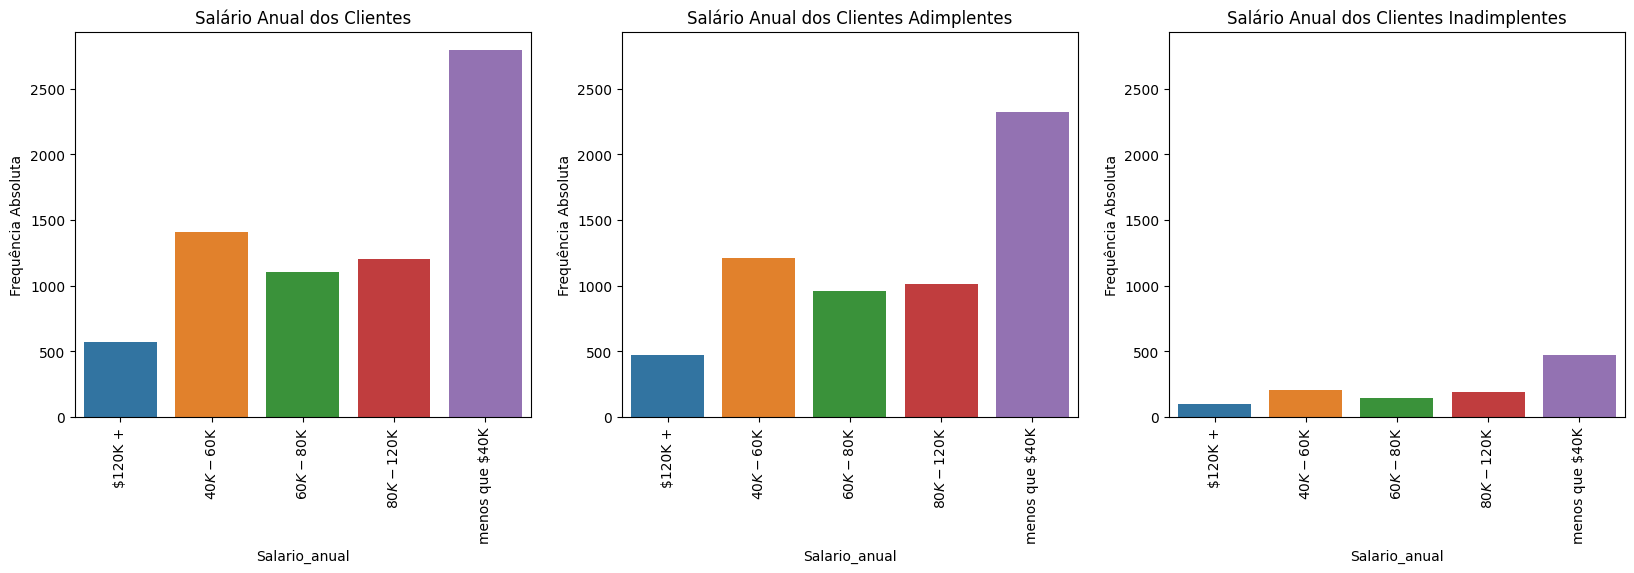

In [38]:
coluna = 'salario_anual'
titulos = ['Salário Anual dos Clientes', 'Salário Anual dos Clientes Adimplentes', 'Salário Anual dos Clientes Inadimplentes']

eixo = 0
max_y = 0
figura, eixos = plt.subplots(1, 3, figsize=(20, 5), sharex=True)

for dataframe in [df_2, df_adimplente, df_inadimplente]:
    df_to_plot = dataframe[coluna].value_counts().to_frame()
    df_to_plot.rename(columns={coluna: 'frequencia_absoluta'}, inplace=True)
    df_to_plot[coluna] = df_to_plot.index
    df_to_plot.reset_index(inplace=True, drop=True)
    df_to_plot.sort_values(by=[coluna], inplace=True)

    f = sns.barplot(x=df_to_plot[coluna], y=df_to_plot['frequencia_absoluta'], ax=eixos[eixo])
    f.set(title=titulos[eixo], xlabel=coluna.capitalize(), ylabel='Frequência Absoluta')
    f.set_xticklabels(labels=f.get_xticklabels(), rotation=90)
    _, max_y_f = f.get_ylim()
    max_y = max_y_f if max_y_f > max_y else max_y
    f.set(ylim=(0, max_y))
    eixo += 1
    
figura.show()

Tendo em vista que o gráfico dos clientes inadimplentes segue a mesma proporção do gráfico de adimplentes, pode-se concluir que o salário anual não é um fator determinante para a inadimplência.

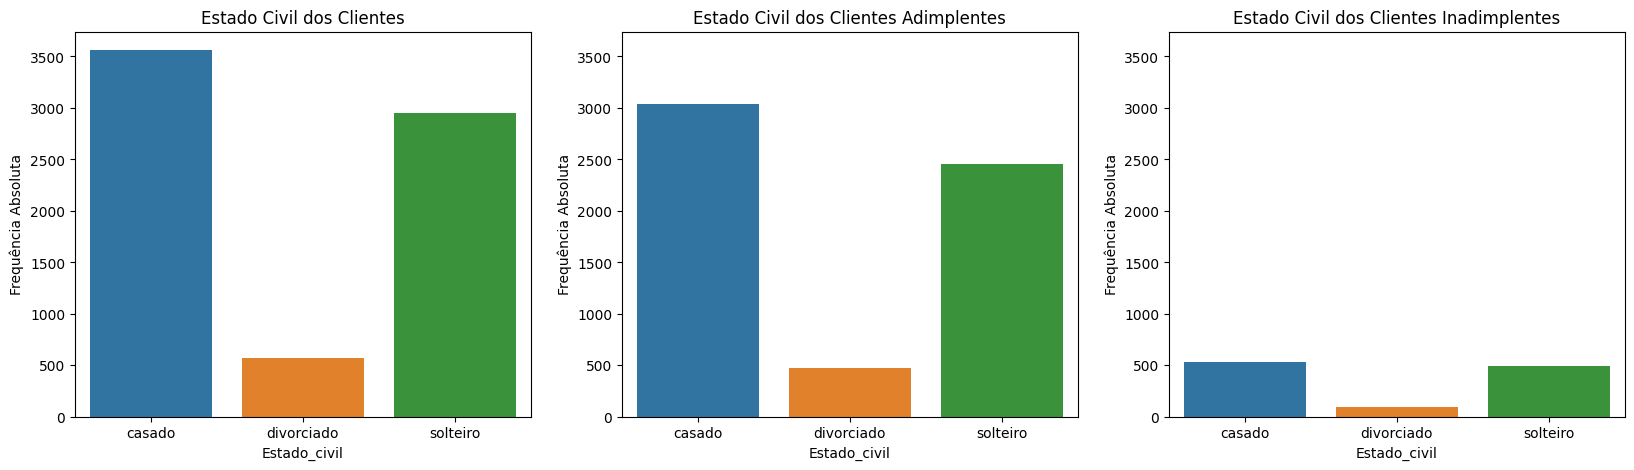

In [39]:
coluna = 'estado_civil'
titulos = ['Estado Civil dos Clientes', 'Estado Civil dos Clientes Adimplentes', 'Estado Civil dos Clientes Inadimplentes']

eixo = 0
max_y = 0
figura, eixos = plt.subplots(1, 3, figsize=(20, 5), sharex=True)

for dataframe in [df_2, df_adimplente, df_inadimplente]:
    df_to_plot = dataframe[coluna].value_counts().to_frame()
    df_to_plot.rename(columns={coluna: 'frequencia_absoluta'}, inplace=True)
    df_to_plot[coluna] = df_to_plot.index
    df_to_plot.reset_index(inplace=True, drop=True)
    df_to_plot.sort_values(by=[coluna], inplace=True)

    f = sns.barplot(x=df_to_plot[coluna], y=df_to_plot['frequencia_absoluta'], ax=eixos[eixo])
    f.set(title=titulos[eixo], xlabel=coluna.capitalize(), ylabel='Frequência Absoluta')
    f.set_xticklabels(labels=f.get_xticklabels())
    _, max_y_f = f.get_ylim()
    max_y = max_y_f if max_y_f > max_y else max_y
    f.set(ylim=(0, max_y))
    eixo += 1
    
figura.show()

Há uma pequena alteração na proporção dos inadimplentes, mas ainda sim não é significativa o suficiente.

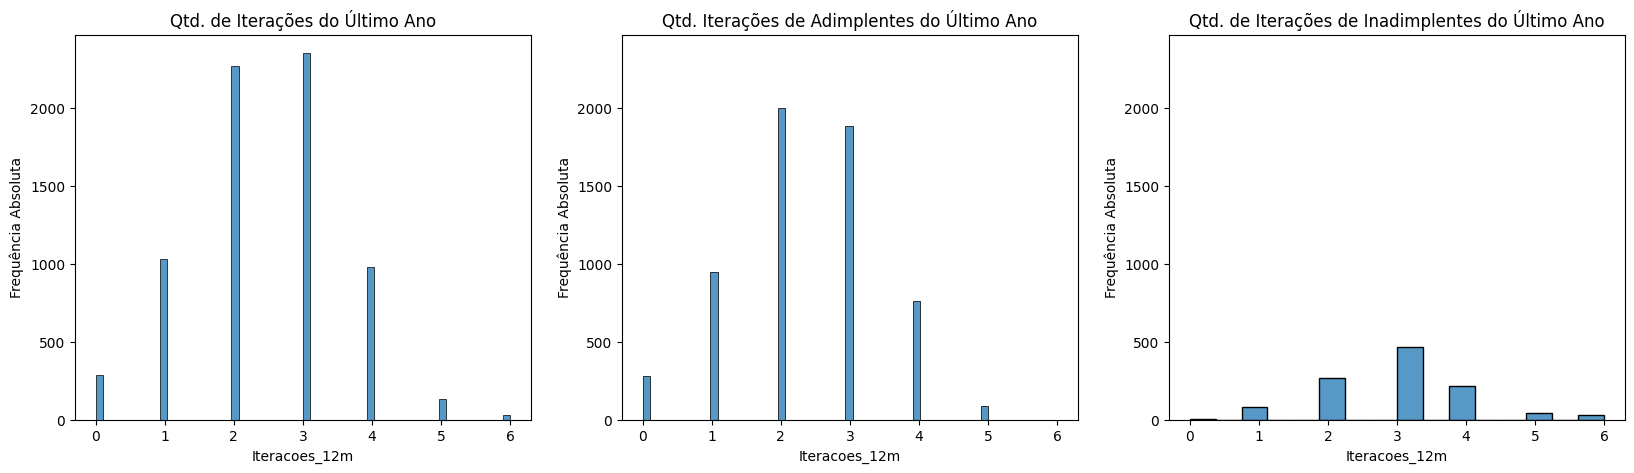

In [40]:
coluna = 'iteracoes_12m'
titulos =['Qtd. de Iterações do Último Ano', 'Qtd. Iterações de Adimplentes do Último Ano', 'Qtd. de Iterações de Inadimplentes do Último Ano']

eixo = 0
max_y =0
figura, eixos = plt.subplots(1, 3, figsize=(20, 5), sharex=True)

for dataframe in [df_2, df_adimplente, df_inadimplente]:
    f = sns.histplot(x=coluna, data=dataframe, stat='count', ax=eixos[eixo])
    f.set(title=titulos[eixo], xlabel=coluna.capitalize(), ylabel='Frequência Absoluta')
    
    _, max_y_f = f.get_ylim()
    max_y = max_y_f if max_y_f > max_y else max_y
    f.set(ylim=(0, max_y))
    
    eixo += 1

figura.show()

Clientes inadimplentes podem chegar a ter 6 iterações.

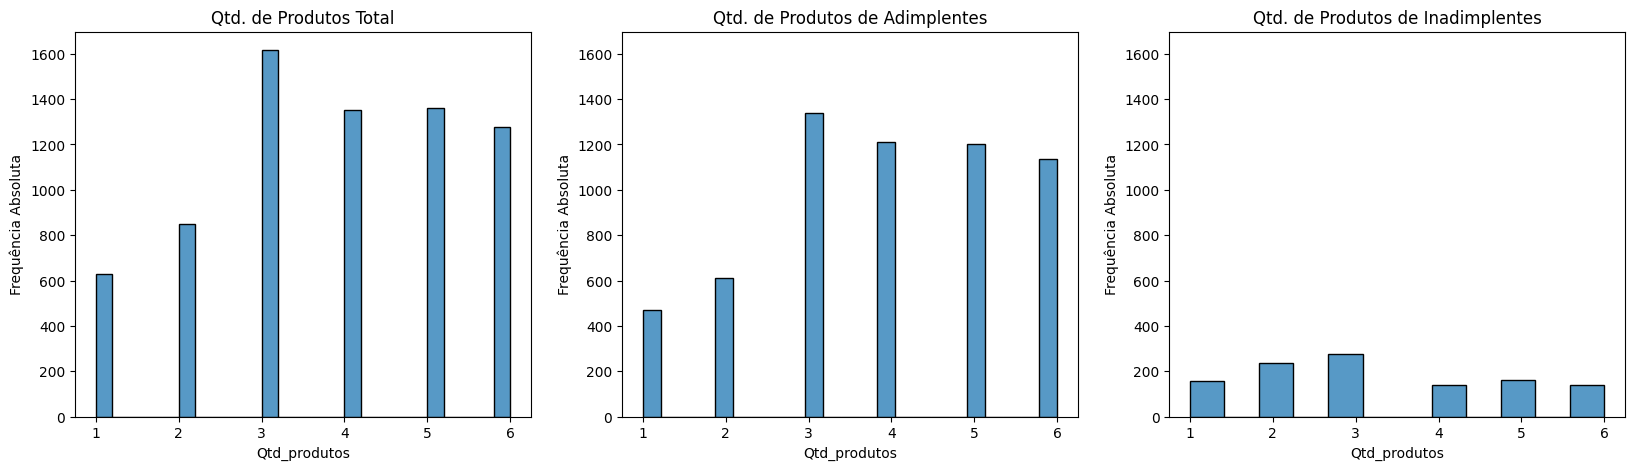

In [41]:
coluna = 'qtd_produtos'
titulos =['Qtd. de Produtos Total', 'Qtd. de Produtos de Adimplentes', 'Qtd. de Produtos de Inadimplentes']

eixo = 0
max_y =0
figura, eixos = plt.subplots(1, 3, figsize=(20, 5), sharex=True)

for dataframe in [df_2, df_adimplente, df_inadimplente]:
    f = sns.histplot(x=coluna, data=dataframe, stat='count', ax=eixos[eixo])
    f.set(title=titulos[eixo], xlabel=coluna.capitalize(), ylabel='Frequência Absoluta')
    
    _, max_y_f = f.get_ylim()
    max_y = max_y_f if max_y_f > max_y else max_y
    f.set(ylim=(0, max_y))
    
    eixo += 1

figura.show()

A maioria dos adimplentes têm de 3 à 6 produtos, enquanto inadimplentes têm de 1 à 3.

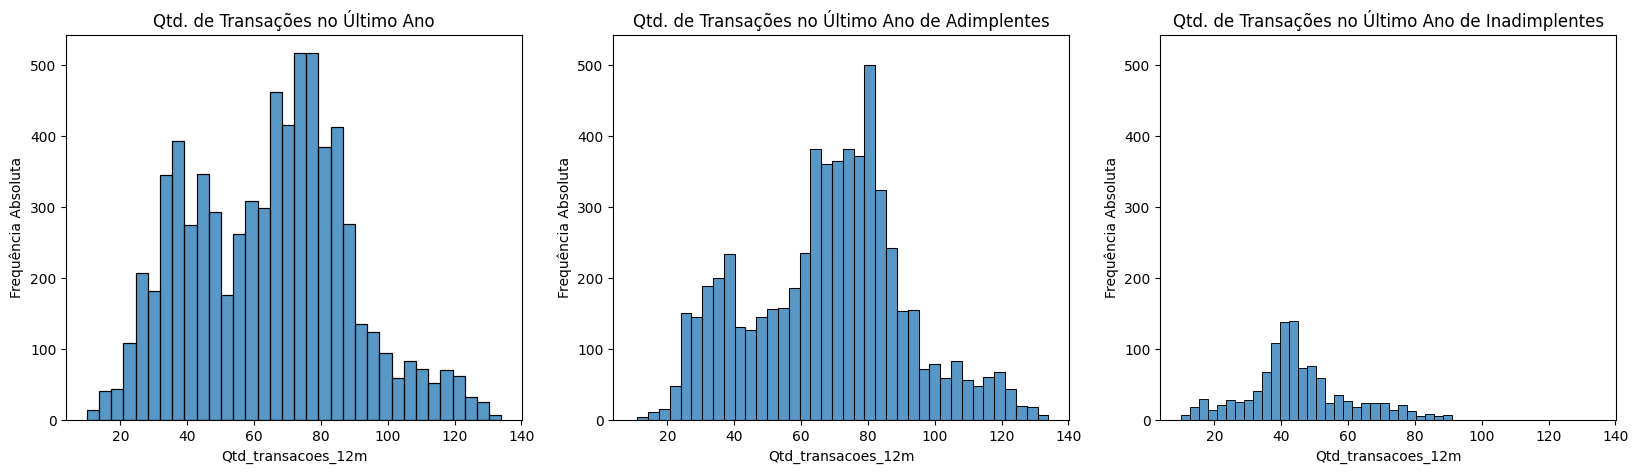

In [42]:
coluna = 'qtd_transacoes_12m'
titulos = ['Qtd. de Transações no Último Ano', 'Qtd. de Transações no Último Ano de Adimplentes', 'Qtd. de Transações no Último Ano de Inadimplentes']

eixo = 0
max_y = 0
figura, eixos = plt.subplots(1, 3, figsize=(20, 5), sharex=True)

for dataframe in [df_2, df_adimplente, df_inadimplente]:
    f = sns.histplot(x=coluna, data=dataframe, stat='count', ax=eixos[eixo])
    f.set(title=titulos[eixo], xlabel=coluna.capitalize(), ylabel='Frequência Absoluta')

    _, max_y_f = f.get_ylim()
    max_y = max_y_f if max_y_f > max_y else max_y
    f.set(ylim=(0, max_y))

    eixo += 1

figura.show()

No gráfico dos adimplentes percebe-se um vale entre 40 e 60 transações, vale este que é preenchido no gráfico total. Logo, conclui-se que a quantidade de transações é um fator determinante na inadimplência.

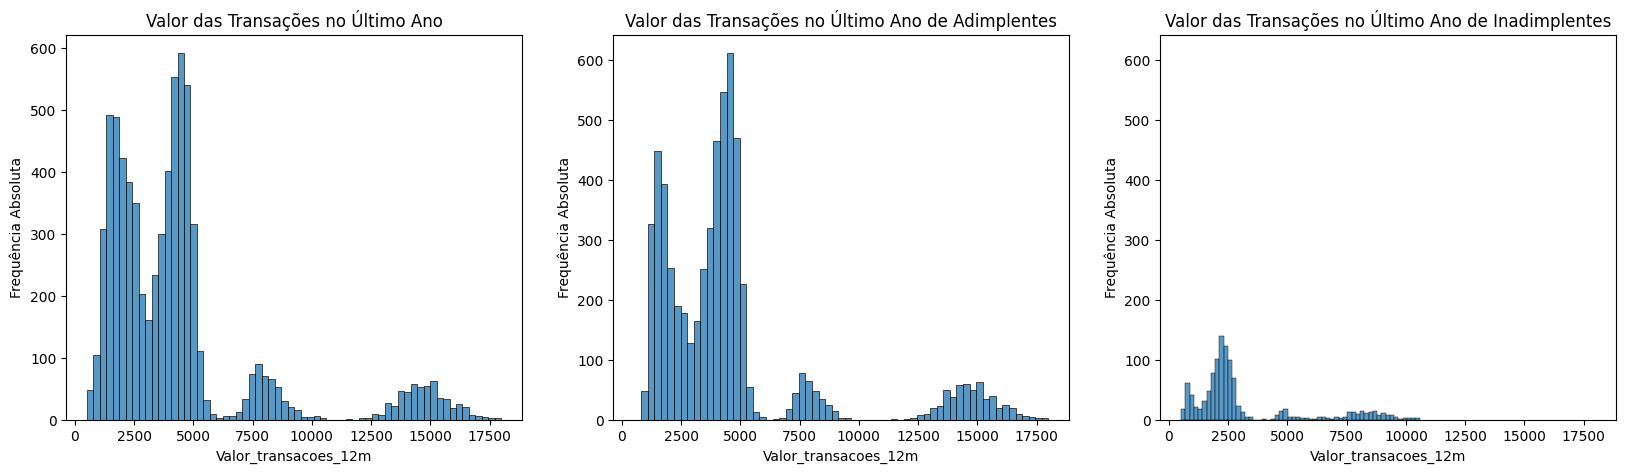

In [43]:
coluna = 'valor_transacoes_12m'
titulos = ['Valor das Transações no Último Ano', 'Valor das Transações no Último Ano de Adimplentes', 'Valor das Transações no Último Ano de Inadimplentes']

eixo = 0
max_y = 0
figura, eixos = plt.subplots(1,3, figsize=(20, 5), sharex=True)

for dataframe in [df_2, df_adimplente, df_inadimplente]:

    f = sns.histplot(x=coluna, data=dataframe, stat='count', ax=eixos[eixo])
    f.set(title=titulos[eixo], xlabel=coluna.capitalize(), ylabel='Frequência Absoluta')

    _, max_y_f = f.get_ylim()
    max_y = max_y_f if max_y_f > max_y else max_y
    f.set(ylim=(0, max_y))

    eixo += 1

figura.show()

Assim como os gráficos das quantidades de transações, o valor das mesmas também é um fator determinante.

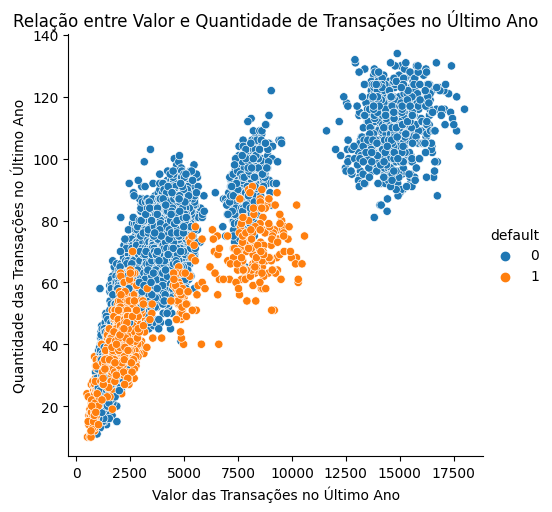

In [44]:
f = sns.relplot(x='valor_transacoes_12m', y='qtd_transacoes_12m', data=df_2, hue='default')
_ = f.set(
    title='Relação entre Valor e Quantidade de Transações no Último Ano', 
    xlabel='Valor das Transações no Último Ano', 
    ylabel='Quantidade das Transações no Último Ano'
  )

Correlacionando ambos fatores determinantes em um gráfico obtemos o gráfico final para análise de risco de inadimplência.

### **Insights**

A maioria dos clientes inadimplentes têm de 1 à 3 produtos contratados e podem chegar a ter 6 iterações com o banco, mas, os aspectos mais relevantes para entender a inadimplência são a quantidade e o valor das transações.

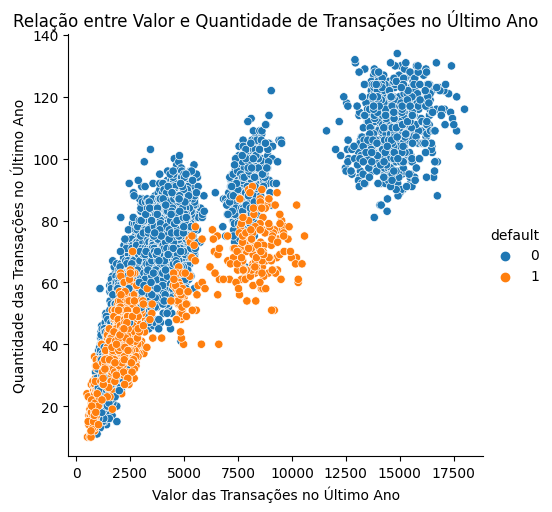

In [45]:
f = sns.relplot(x='valor_transacoes_12m', y='qtd_transacoes_12m', data=df_2, hue='default')
_ = f.set(
    title='Relação entre Valor e Quantidade de Transações no Último Ano', 
    xlabel='Valor das Transações no Último Ano', 
    ylabel='Quantidade das Transações no Último Ano'
  )

Correlacionando ambos em um gráfico chegamos a conclusão de que todos os clientes inadimplentes no último ano fizeram menos de 90 transações somando um valor inferior à 11000.